## World Happiness Report for 2019
The **World Happiness Report** is a landmark survey of the **state of global happiness**. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. **The World Happiness 2017**, which ranks **155** countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. **Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations**. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
The dataset can be downlaoded from Kaggle [World Happiness](https://www.kaggle.com/unsdsn/world-happiness).

Here are the descriptions for some of the columns we'll be working with:

* **Country** — name of the country
* **Region** — name of the region the country belongs to (**`Region` not included in the 2019 dataset**)
* **Happiness Rank** — the rank of the country, as determined by its happiness score
* **Happiness Score** — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
* **Family** — the estimated extent to which family contributes to the happiness score
* **Freedom** — the estimated extent to which freedom contributes to the happiness score
* **Generosity** — the estimated extent to which generosity contributes to the happiness score

**NOTE: These reports assign each country a `happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10`, so "world happiness" refers to this definition specifically.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
happiness2019 = pd.read_csv('./data_world_happiness/2019.csv')
print(happiness2019.shape)
happiness2019.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
happiness2019.columns = [col.strip().replace(' ', '_') for col in list(happiness2019)]
list(happiness2019)

['Overall_rank',
 'Country_or_region',
 'Score',
 'GDP_per_capita',
 'Social_support',
 'Healthy_life_expectancy',
 'Freedom_to_make_life_choices',
 'Generosity',
 'Perceptions_of_corruption']

In [4]:
z = happiness2019.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
Series([], dtype: int64)


### Visualize Happiness Score of each Country per Region

In [5]:
unique_Country_or_region = happiness2019.Country_or_region.unique()
unique_Country_or_region

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [6]:
africa_54 = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 
             'Central African Republic', 'Chad', 'Comoros', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 
             'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 
             'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 
             'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 
             'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 
             'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

In [7]:
africa = happiness2019.loc[happiness2019.Country_or_region.isin(africa_54), :]

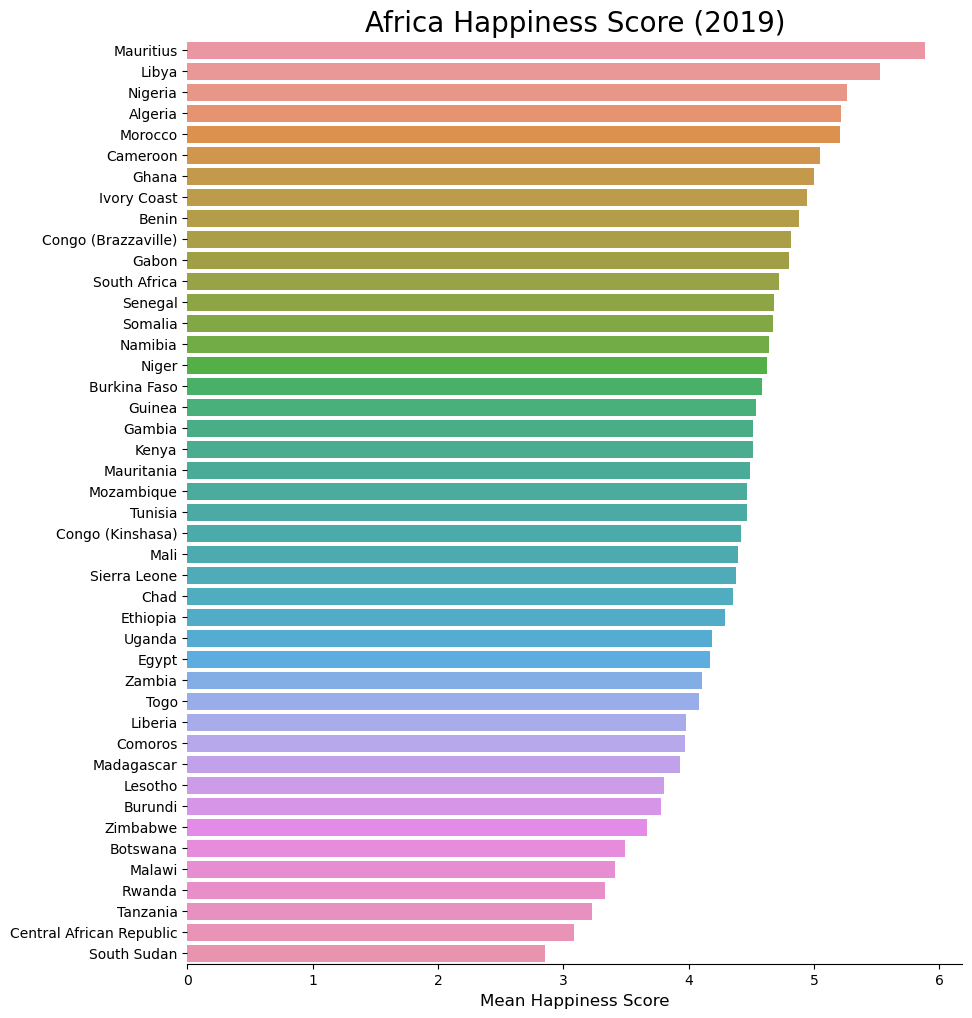

In [8]:
fig, ax = plt.subplots(figsize = (10, 12))
data = africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Africa Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

### TOP10 Happy African Countries 

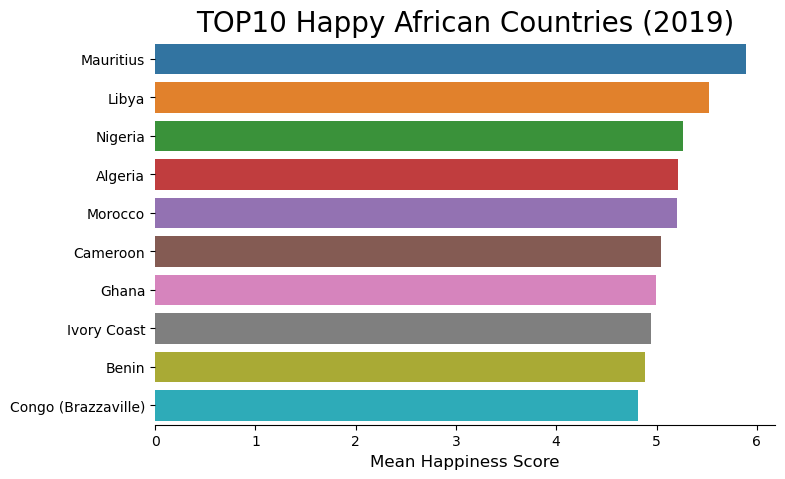

In [9]:
top10_africa = africa.head(10)

fig, ax = plt.subplots(figsize = (8, 5))
data = top10_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('TOP10 Happy African Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('TOP10 Happy African Countries (2019).png', dpi = 300)

### BOTTOM10 Happy African Countries 

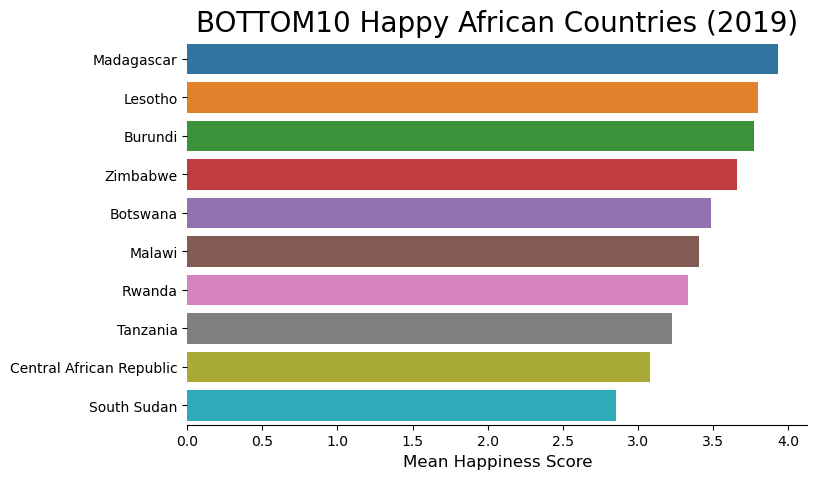

In [10]:
bottom10_africa = africa.tail(10)

fig, ax = plt.subplots(figsize = (8, 5))
data = bottom10_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('BOTTOM10 Happy African Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('BOTTOM10 Happy African Countries (2019).png', dpi = 300)

**It's difficult to argue with data but it's hard to believe that `Rwanda` is among the `bottom 10` African countries in terms of happiness! And this is from `2019` survey!**

### Happiness in Sub-Saharan African Countries

In [11]:
sub_sahara = ['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 
              'Chad', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Comoros', 'Ivory Coast', 'Djibouti', 'Eritrea', 
              'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Equatorial Guinea', 'Guinea-Bissau', 'Kenya', 
              'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte', 'Mozambique', 
              'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 
              'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']

In [12]:
africa_sub_sahara = happiness2019.loc[happiness2019.Country_or_region.isin(sub_sahara), :]

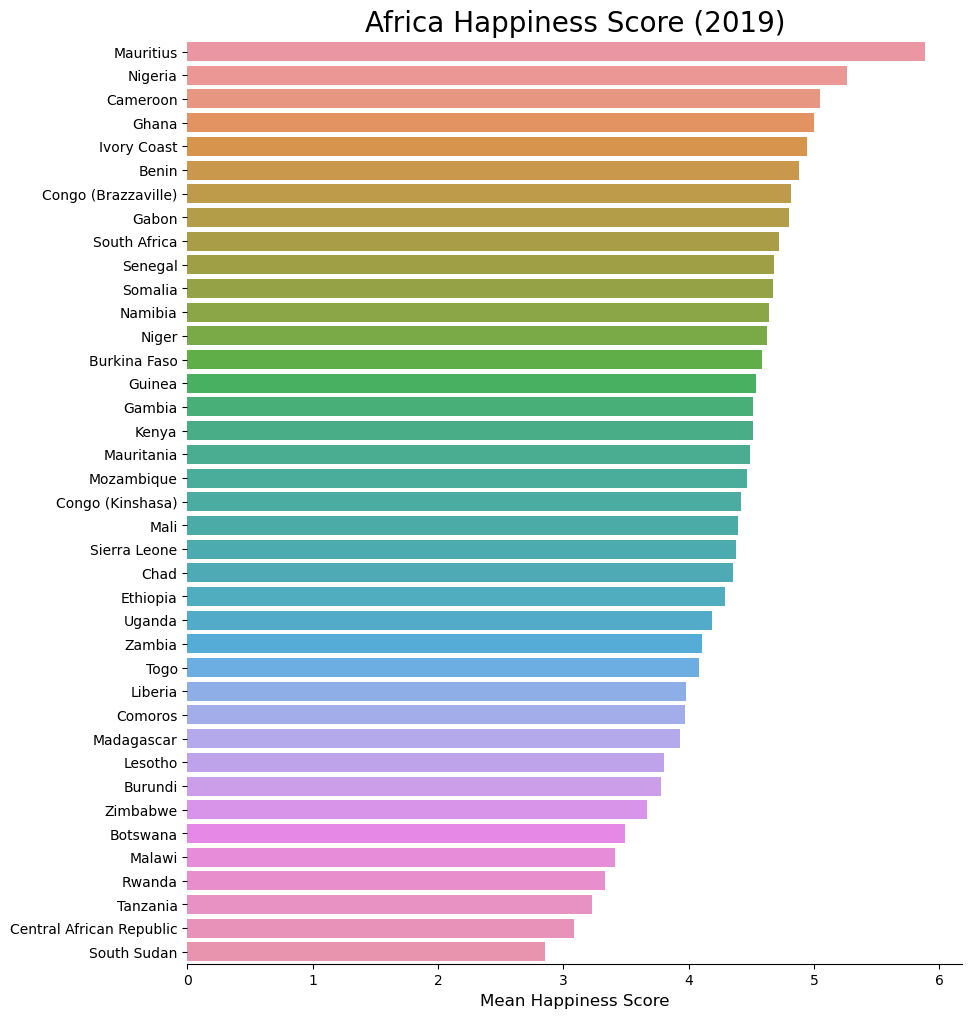

In [13]:
fig, ax = plt.subplots(figsize = (10, 12))
data = africa_sub_sahara.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Africa Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

### TOP10 Happy Sub-Sahara African Countries

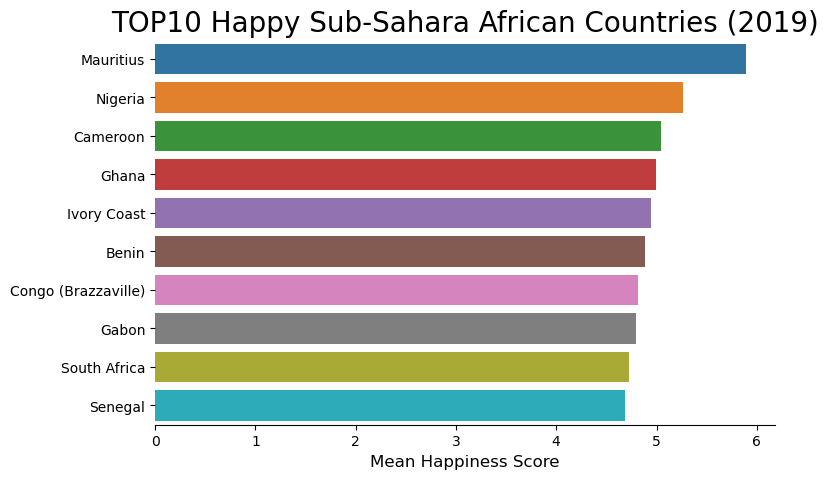

In [14]:
top10_sa_africa = africa_sub_sahara.head(10)

fig, ax = plt.subplots(figsize = (8, 5))
data = top10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('TOP10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('TOP10 Happy Sub-Sahara African Countries (2019).png', dpi = 300)

In [15]:
fig.savefig('TOP10_Happy_Sub-Sahara_African_Countries.png')

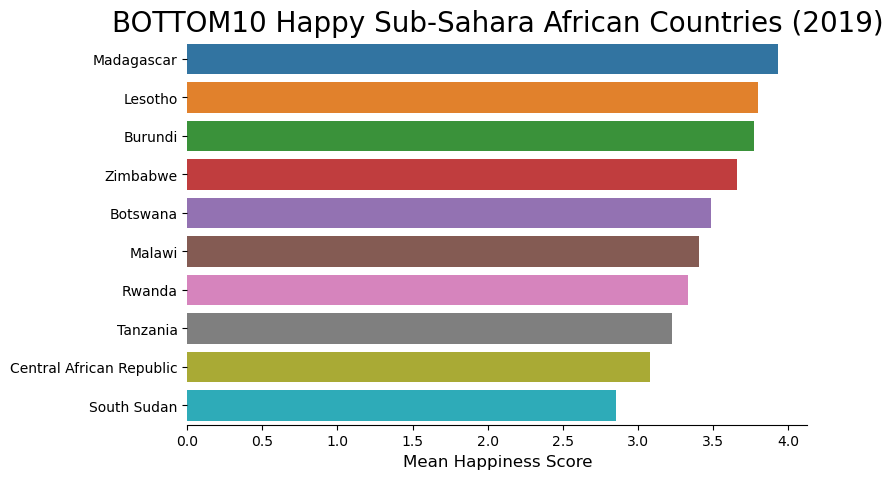

In [16]:
bottom10_sa_africa = africa_sub_sahara.tail(10)

fig, ax = plt.subplots(figsize = (8, 5))
data = bottom10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('BOTTOM10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('BOTTOM10 Happy Sub-Sahara African Countries (2019).png', dpi = 300)

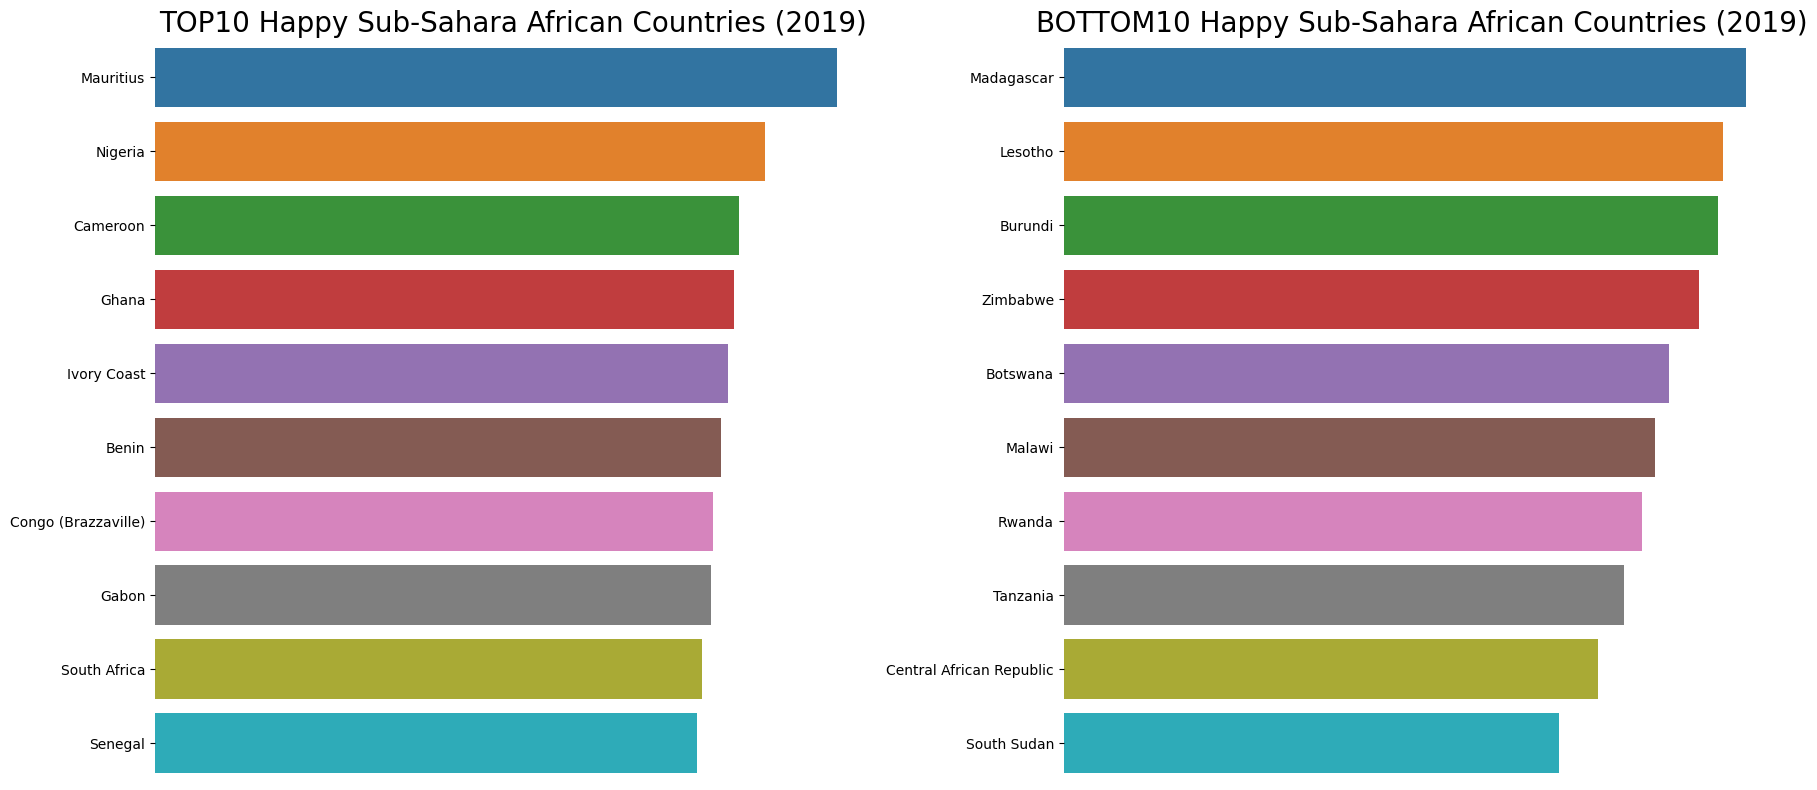

In [17]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))
data = top10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax[0])
  
ax[0].set_title('TOP10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_ylabel(None)

data = bottom10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax[1])
 
ax[1].set_title('BOTTOM10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[1].set_ylabel(None)

fig.tight_layout()
plt.show()
fig.savefig('TOP10_BOTTOM10 Happy Sub-Sahara African Countries (2019).png', dpi = 300)

### Happiness in Countries in Middle East and North Africa

In [18]:
n_africa_me = ['United Arab Emirates', 'Bahrain', 'Djibouti', 'Algeria', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 
         'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Malta', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'Yemen']

In [19]:
n_africa_me = happiness2019.loc[happiness2019.Country_or_region.isin(n_africa_me), :]

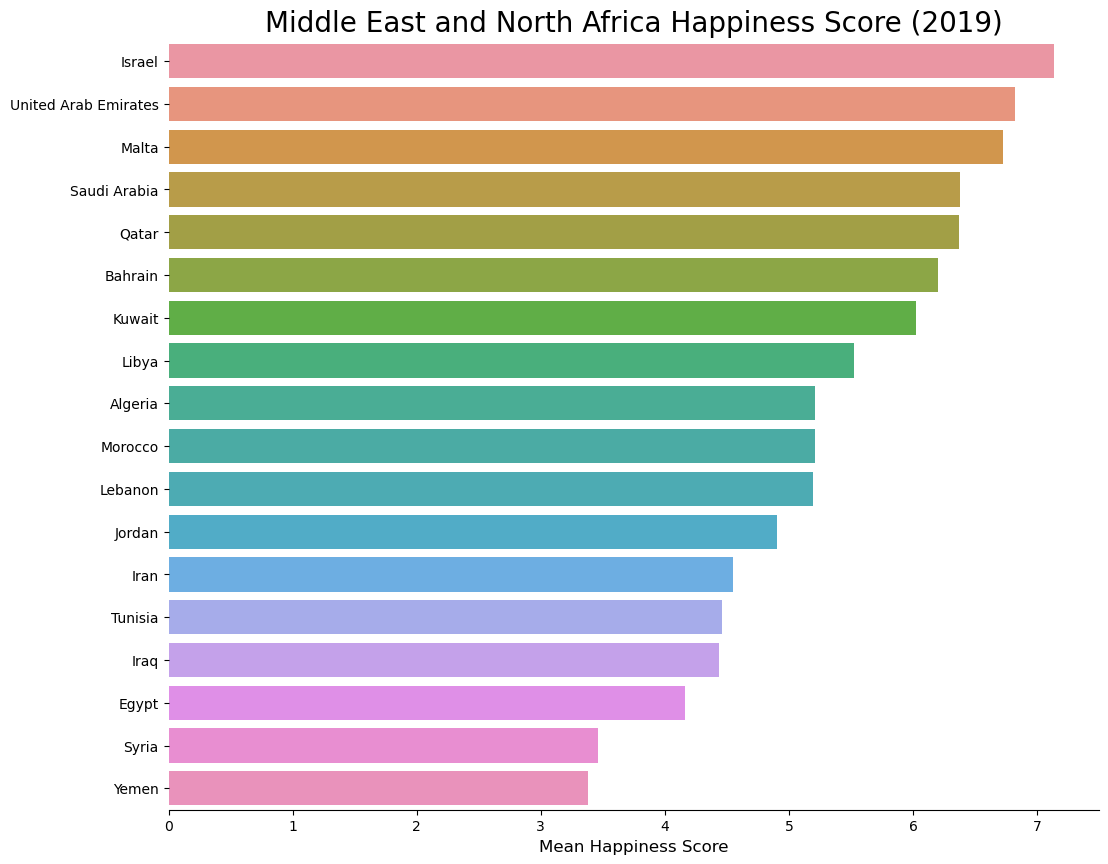

In [20]:
fig, ax = plt.subplots(figsize = (12, 10))
data = n_africa_me.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Middle East and North Africa Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('Middle East and North Africa Happiness Score (2019).png', dpi = 300)

### Happiness in Southeast Asian Countries

In [21]:
se_asia = ['Brunei', 'Myanmar',  'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 
           'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

In [22]:
southeast_asia = happiness2019.loc[happiness2019.Country_or_region.isin(se_asia), :]

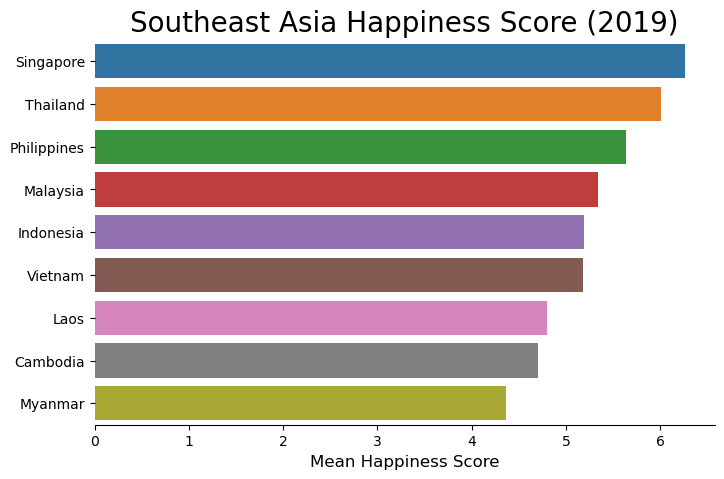

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
data = southeast_asia.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Southeast Asia Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('Southeast Asia Happiness Score (2019).png', dpi = 300)

### Happiness in Southern Asian Countries

In [24]:
so_saia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Sri Lanka', 'Maldives', 'Nepal', 'Pakistan']
southern_asia = happiness2019.loc[happiness2019.Country_or_region.isin(so_saia), :]

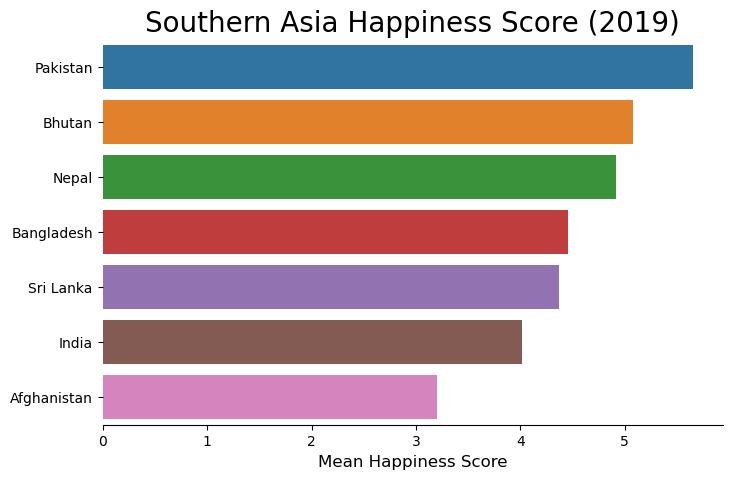

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))
data = southern_asia.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Southern Asia Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('Southern Asia Happiness Score (2019).png', dpi = 300)

### Happiness in Easthern Asian Countries

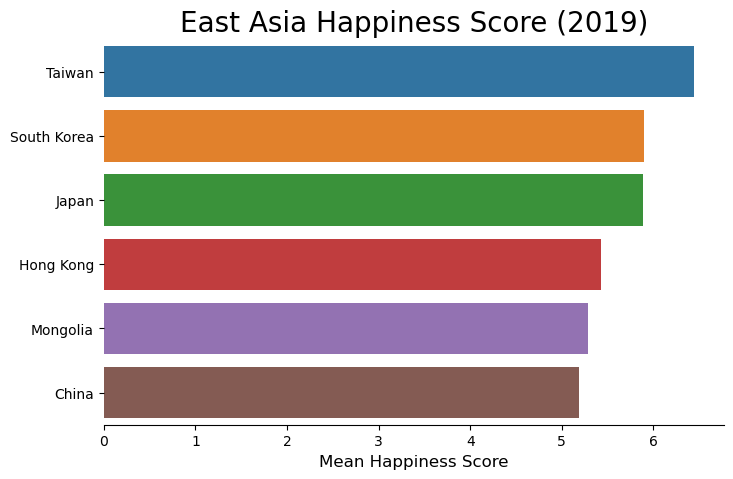

In [26]:
east_asia = ['China', 'Hong Kong', 'Japan', 'Macau', 'Mongolia', 'North Korea', 'South Korea', 'Taiwan']
easthern_asia = happiness2019.loc[happiness2019.Country_or_region.isin(east_asia), :]

fig, ax = plt.subplots(figsize = (8, 5))
data = easthern_asia.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('East Asia Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('East Asia Happiness Score (2019).png', dpi = 300)

## European Countries Happiness Scores
### Western Europe

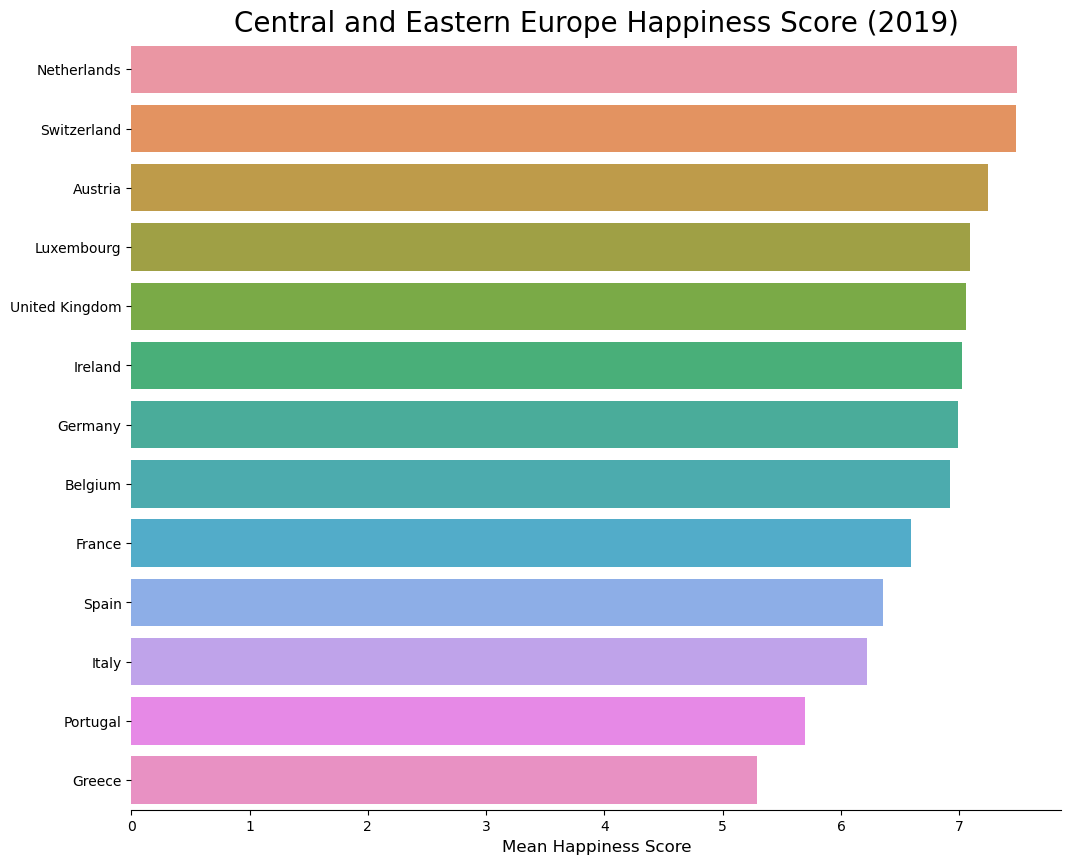

In [27]:
west_eu = ['United Kingdom', 'Luxembourg', 'Ireland', 'Netherlands', 'Monaco', 'Belgium', 
           'France', 'Germany', 'Austria', 'Switzerland', 'Liechtenstein',
          'Italy', 'Spain', 'Greece', 'Portugal']
westhern_eu = happiness2019.loc[happiness2019.Country_or_region.isin(west_eu), :]

fig, ax = plt.subplots(figsize = (12, 10))
data = westhern_eu.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Central and Eastern Europe Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('Western Europe Happiness Score (2019).png', dpi = 300)

## Happiness in Central and Eastern Europe

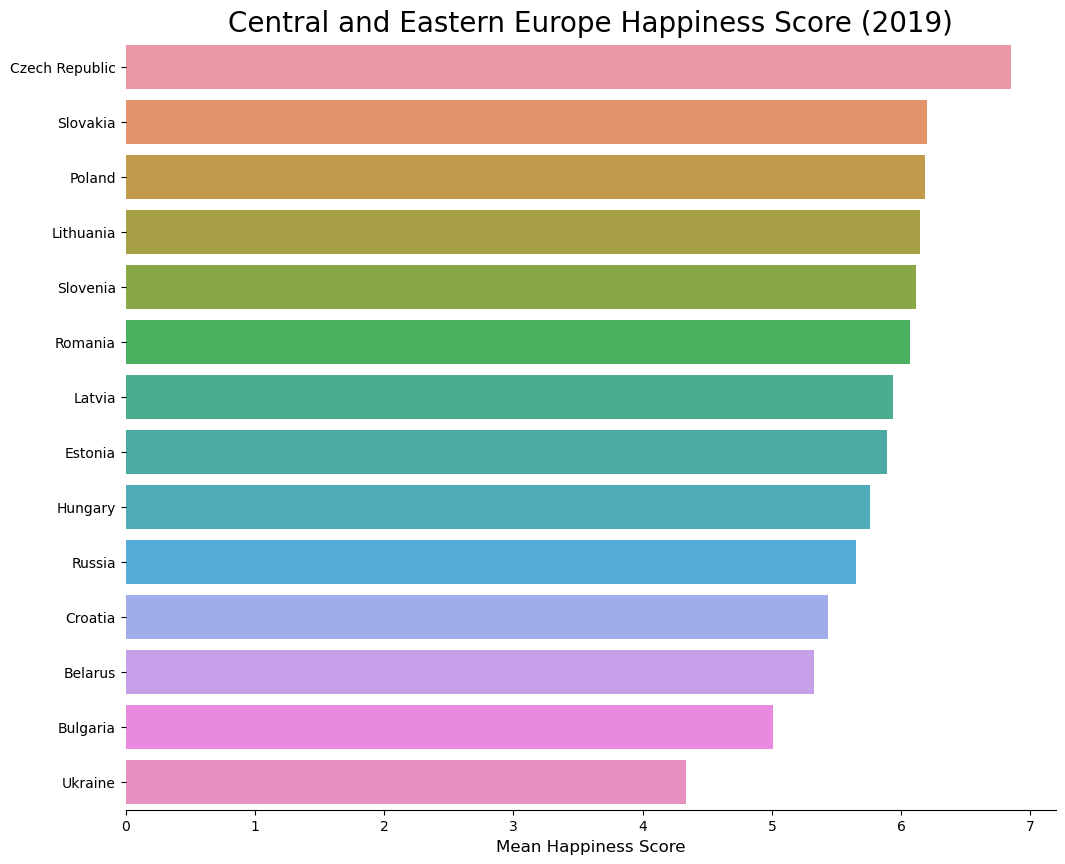

In [28]:
central_east_eu = ['Bulgaria', 'Croatia', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Poland', 
                   'Romania', 'Slovenia', 'Slovakia', 'Czech Republic', 'Russia', 'Ukraine', 'Belarus']
central_eastern_eu = happiness2019.loc[happiness2019.Country_or_region.isin(central_east_eu), :]

fig, ax = plt.subplots(figsize = (12, 10))
data = central_eastern_eu.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('Central and Eastern Europe Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('Central and Eastern Europe Happiness Score (2019).png', dpi = 300)

## Happiness in the Americas and Caribbean

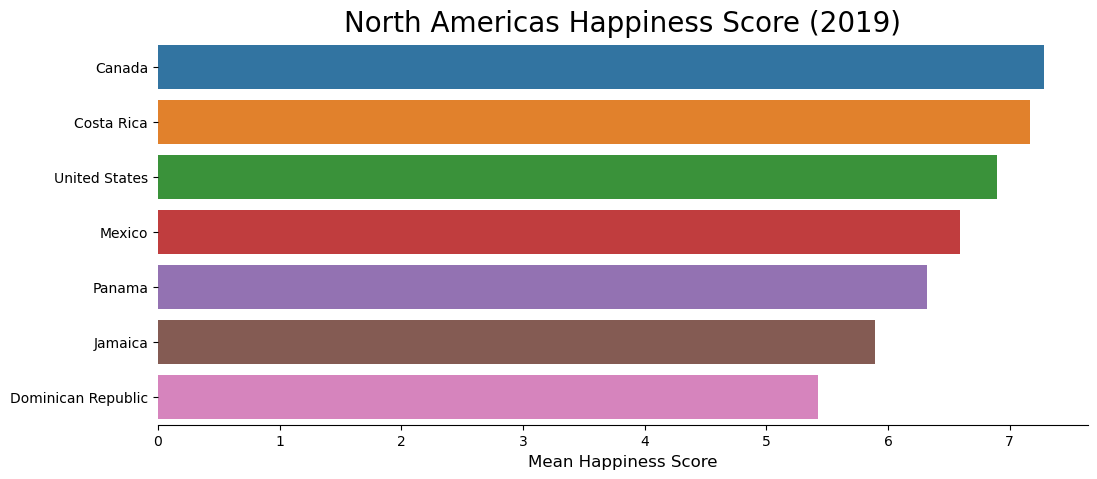

In [29]:
north_america = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Canada','Costa Rica', 'Cuba', 'Dominica', 
                 'Dominican Republic', 'Grenada', 'Jamaica', 'Mexico', 'Panama', 'Papua New Guinea',
                 'Trinidad and Tobago', 'United States']

north_americas = happiness2019.loc[happiness2019.Country_or_region.isin(north_america), :]

fig, ax = plt.subplots(figsize = (12, 5))
data = north_americas.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax)
plt.title('North Americas Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('North Americas Happiness Score (2019).png', dpi = 300)

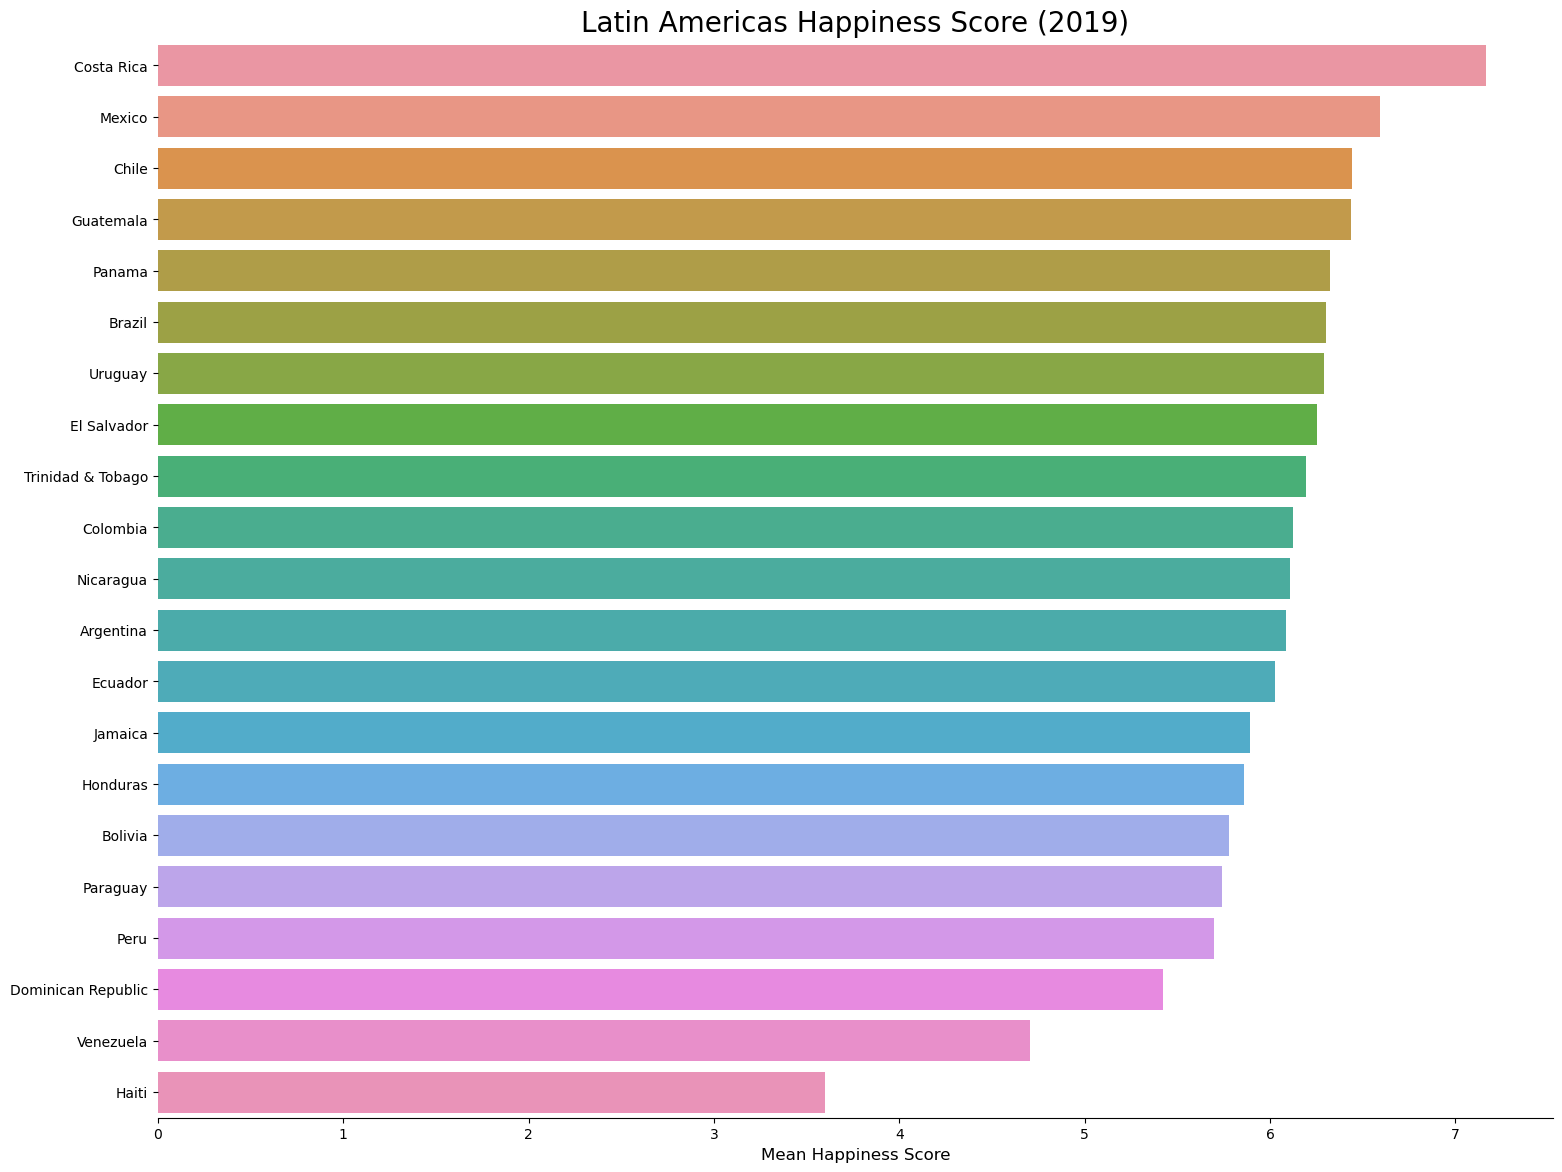

In [30]:
latin_america_carrib = ['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Belize', 'Bolivia',
                        'Brazil', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
                        'Cayman Islands', 'Dominica', 'Dominican Republic', 'Ecuador',
                        'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Haiti', 'Jamaica',
                        'St. Kitts and Nevis', 'St. Lucia', 'Mexico', 'Nicaragua', 'Panama', 
                        'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname', 
                        'Saint Maarten', 'Turks and Caicos Isl', 'Trinidad & Tobago', 
                        'Uruguay', 'St. Vincent and the Grenadines', 'Venezuela', 'Virgin Islands']

latin_america_carribbean = happiness2019.loc[happiness2019.Country_or_region.isin(latin_america_carrib), :]

fig, ax = plt.subplots(figsize = (18, 14))

data = latin_america_carribbean
data = data.sort_values(by = 'Score', ascending = False)
sns.barplot(x = 'Score', y = 'Country_or_region', data = data, ax = ax)

plt.title('Latin Americas Happiness Score (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

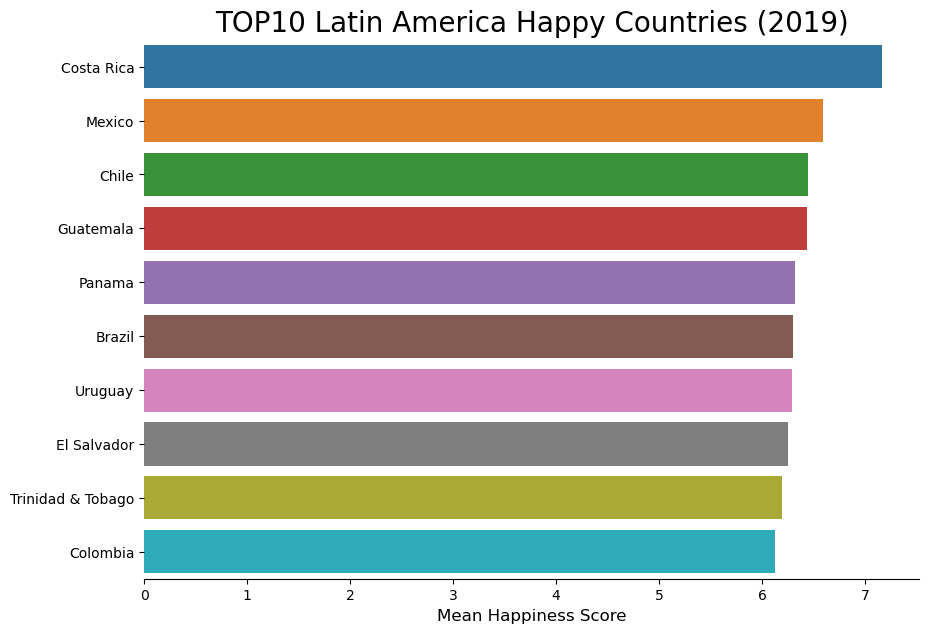

In [31]:
latin_america_carrib = ['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Belize', 'Bolivia',
                        'Brazil', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
                        'Cayman Islands', 'Dominica', 'Dominican Republic', 'Ecuador',
                        'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Haiti', 'Jamaica',
                        'St. Kitts and Nevis', 'St. Lucia', 'Mexico', 'Nicaragua', 'Panama', 
                        'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname', 
                        'Saint Maarten', 'Turks and Caicos Isl', 'Trinidad & Tobago', 
                        'Uruguay', 'St. Vincent and the Grenadines', 'Venezuela', 'Virgin Islands']

latin_america_carribbean = happiness2019.loc[happiness2019.Country_or_region.isin(latin_america_carrib), :]

fig, ax = plt.subplots(figsize = (10, 7))

data = latin_america_carribbean.head(10)
data = data.sort_values(by = 'Score', ascending = False)
sns.barplot(x = 'Score', y = 'Country_or_region', data = data, ax = ax)

plt.title('TOP10 Latin America Happy Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('TOP10 Latin America Happy Countries (2019).png', dpi = 300)

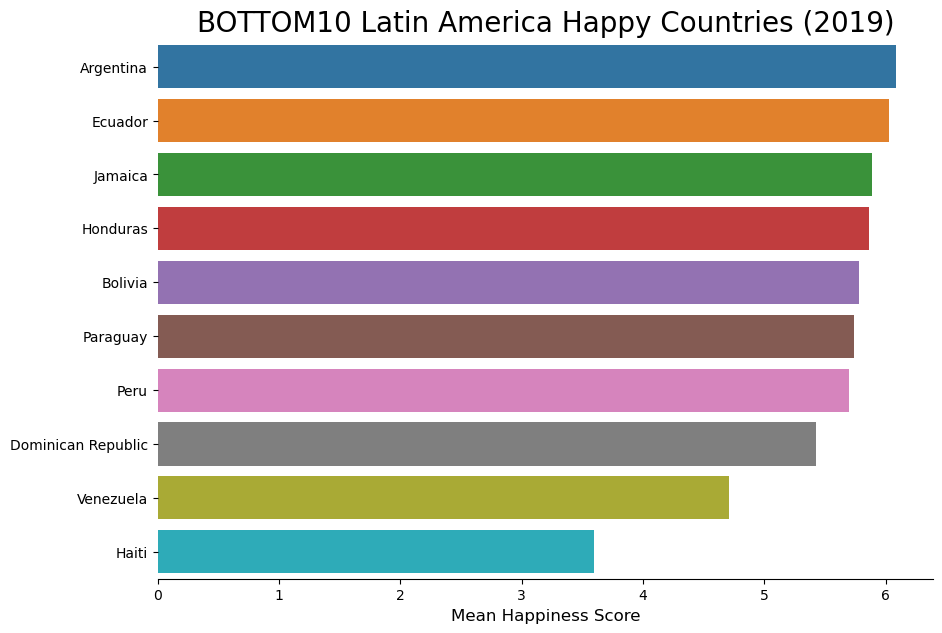

In [32]:
latin_america_carrib = ['Aruba', 'Argentina', 'Antigua and Barbuda', 'Bahamas', 'Belize', 'Bolivia',
                        'Brazil', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
                        'Cayman Islands', 'Dominica', 'Dominican Republic', 'Ecuador',
                        'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Haiti', 'Jamaica',
                        'St. Kitts and Nevis', 'St. Lucia', 'Mexico', 'Nicaragua', 'Panama', 
                        'Peru', 'Puerto Rico', 'Paraguay', 'El Salvador', 'Suriname', 
                        'Saint Maarten', 'Turks and Caicos Isl', 'Trinidad & Tobago', 
                        'Uruguay', 'St. Vincent and the Grenadines', 'Venezuela', 'Virgin Islands']

latin_america_carribbean = happiness2019.loc[happiness2019.Country_or_region.isin(latin_america_carrib), :]

fig, ax = plt.subplots(figsize = (10, 7))

data = latin_america_carribbean.tail(10)
data = data.sort_values(by = 'Score', ascending = False)
sns.barplot(x = 'Score', y = 'Country_or_region', data = data, ax = ax)

plt.title('BOTTOM10 Latin America Happy Countries (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('BOTTOM10 Latin America Happy Countries (2019).png', dpi = 300)

## New Zealand and Australia

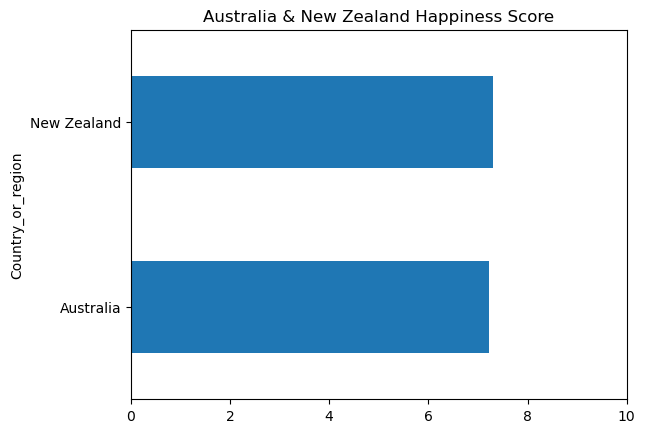

In [33]:
australia_newz = happiness2019.loc[happiness2019.Country_or_region.isin(['New Zealand', 'Australia']), :]

fig, ax = plt.subplots()
australia_newz.sort_values(by = 'Score').plot(x = 'Country_or_region', y = 'Score', kind = 'barh', title = 'Australia & New Zealand Happiness Score', xlim = (0, 10), ax = ax)
ax.legend().remove()
plt.show()

## Mean Happiness Score by Regions

In [34]:
happiness_score = {'Regions': ['Western Europe', 'Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
                              'North America', 'Middle East and North Africa', 'Latin America and Carribbean',
                              'Eastern Asia', 'Central and Eastern Europe', 'Australia and New Zealand'],
                   'Mean_Happiness_Score': [westhern_eu.Score.mean(), africa_sub_sahara.Score.mean(), 
                                           southern_asia.Score.mean(), southeast_asia.Score.mean(), 
                                           north_americas.Score.mean(), n_africa_me.Score.mean(), 
                                           latin_america_carribbean.Score.mean(), easthern_asia.Score.mean(),
                                           central_eastern_eu.Score.mean(), australia_newz.Score.mean()]
                  }
happiness = pd.DataFrame(happiness_score)
happiness.sort_values(by = 'Mean_Happiness_Score', inplace = True, ascending = False)
happiness

,Regions,Mean_Happiness_Score
9,Australia and New Zealand,7.267500
0,Western Europe,6.725846
4,North America,6.509714
6,Latin America and Carribbean,5.954429
8,Central and Eastern Europe,5.779000
7,Eastern Asia,5.688833
5,Middle East and North Africa,5.342222
3,Southeastern Asia,5.273667
2,Southern Asia,4.526857
1,Sub-Saharan Africa,4.302308


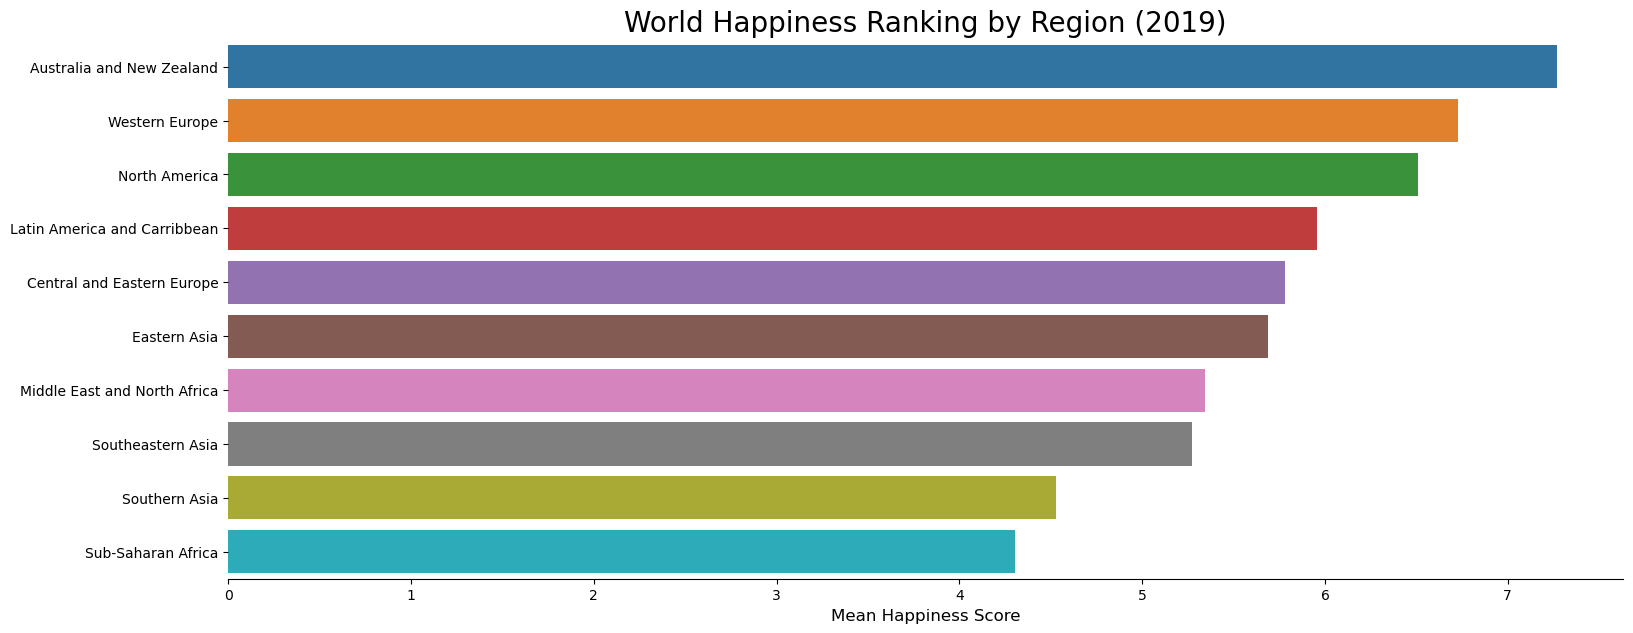

In [35]:
fig, ax = plt.subplots(figsize = (18, 7))


data = happiness.sort_values(by = 'Mean_Happiness_Score', ascending = False)
sns.barplot(y = 'Regions', x = 'Mean_Happiness_Score', data = data, ax = ax)

plt.title('World Happiness Ranking by Region (2019)', fontsize = 20)
plt.xlabel('Mean Happiness Score', fontsize = 12)
plt.ylabel(None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()
fig.savefig('World Happiness Ranking by Region (2019).png', dpi = 300)

**We can conclude that, on average, Western European countries and North America countries are the most happy nations while Asia and African countries are the least happy nations!**

### Which features correlate with Happiness Score

In [36]:
corr = happiness2019.loc[:, list(happiness2019)[2:]].corr()
corr

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP_per_capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social_support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy_life_expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom_to_make_life_choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions_of_corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [37]:
score_corr = corr.iloc[1:, 0]
score_corr

GDP_per_capita                  0.793883
Social_support                  0.777058
Healthy_life_expectancy         0.779883
Freedom_to_make_life_choices    0.566742
Generosity                      0.075824
Perceptions_of_corruption       0.385613
Name: Score, dtype: float64

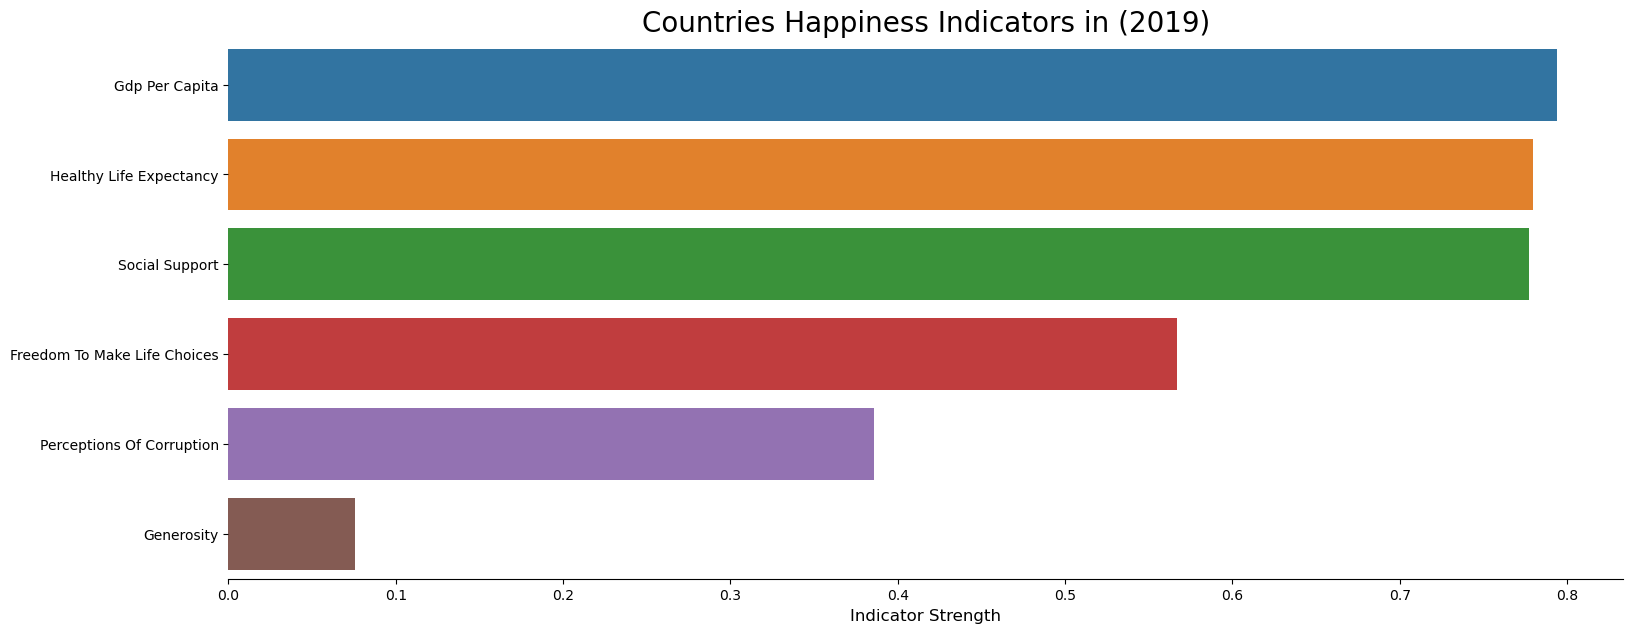

In [38]:
fig, ax = plt.subplots(figsize = (18, 7))


data = score_corr.sort_values(ascending = False) 
data.index = [name.replace('_', ' ').title() for name in data.index]
sns.barplot(y = data.index, x = data.values, ax = ax)

plt.title('Countries Happiness Indicators in (2019)', fontsize = 20)
plt.xlabel('Indicator Strength', fontsize = 12)
plt.ylabel(None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()
fig.savefig('Happiness Indicators (2019).png', dpi = 300)

**Again, looking at these indicators and how they correlate with the happiness `Score`, it's difficult to making a convincing statement regarding the position of some African countries. These indicators suggest that a country like Rwanda should be among the top 5 happy countries in Africa!**

### Happiness and Factors affecting Happiness

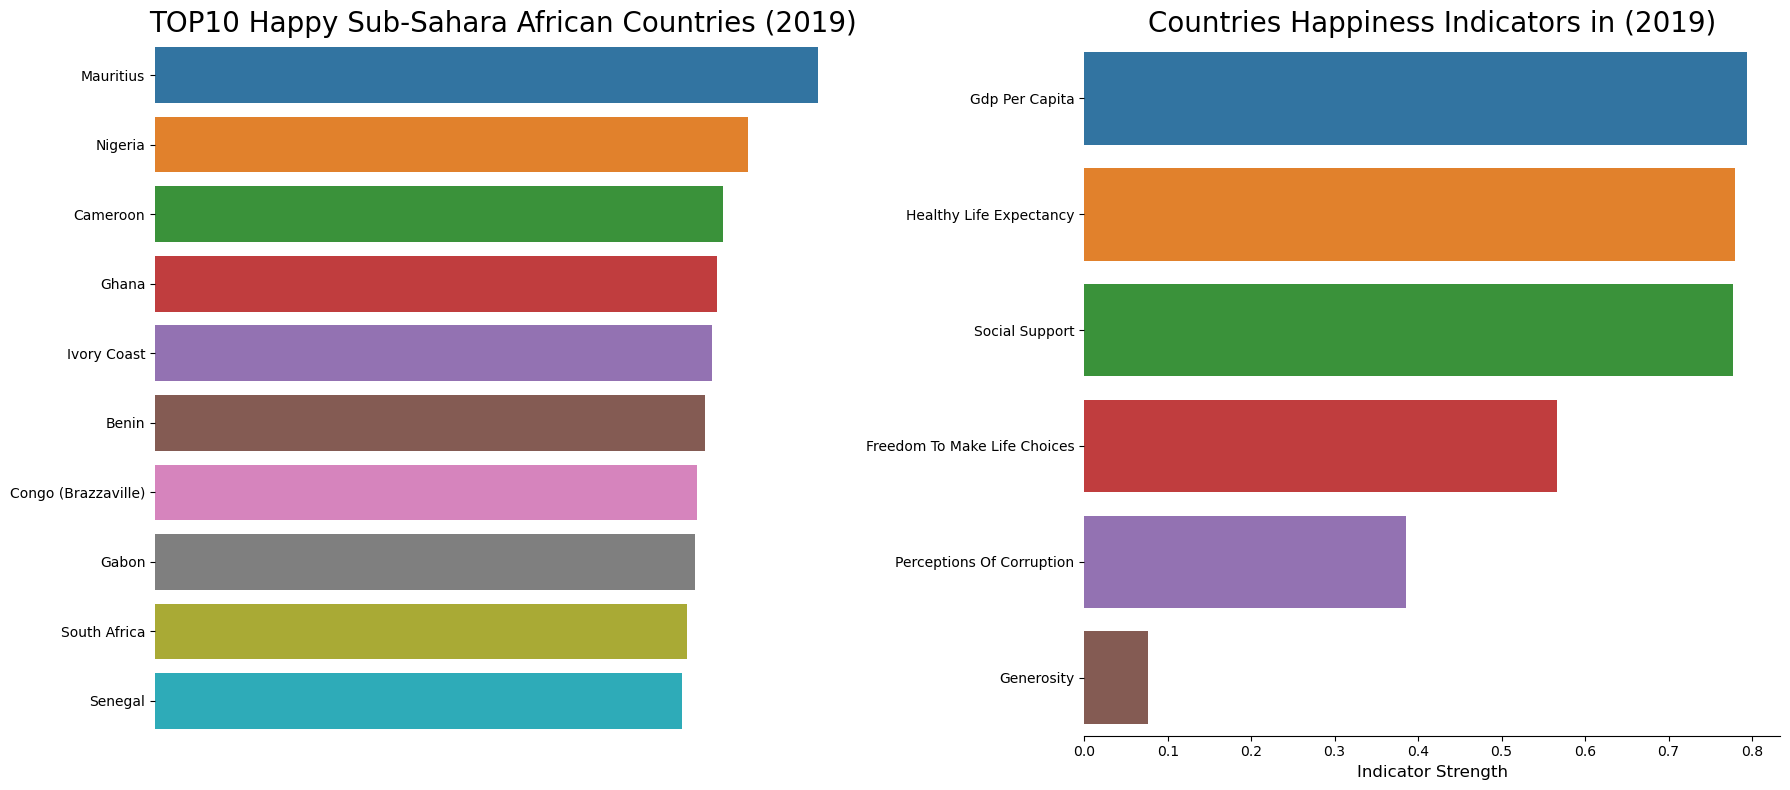

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))
data = top10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax[0])
  
ax[0].set_title('TOP10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_ylabel(None)

data = score_corr.sort_values(ascending = False) 
data.index = [name.replace('_', ' ').title() for name in data.index]
sns.barplot(y = data.index, x = data.values, ax = ax[1])

plt.title('Countries Happiness Indicators in (2019)', fontsize = 20)
plt.xlabel('Indicator Strength', fontsize = 12)
plt.ylabel(None)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('TOP10 Happy Sub-Sahara African Countries (2019).png', dpi = 300)

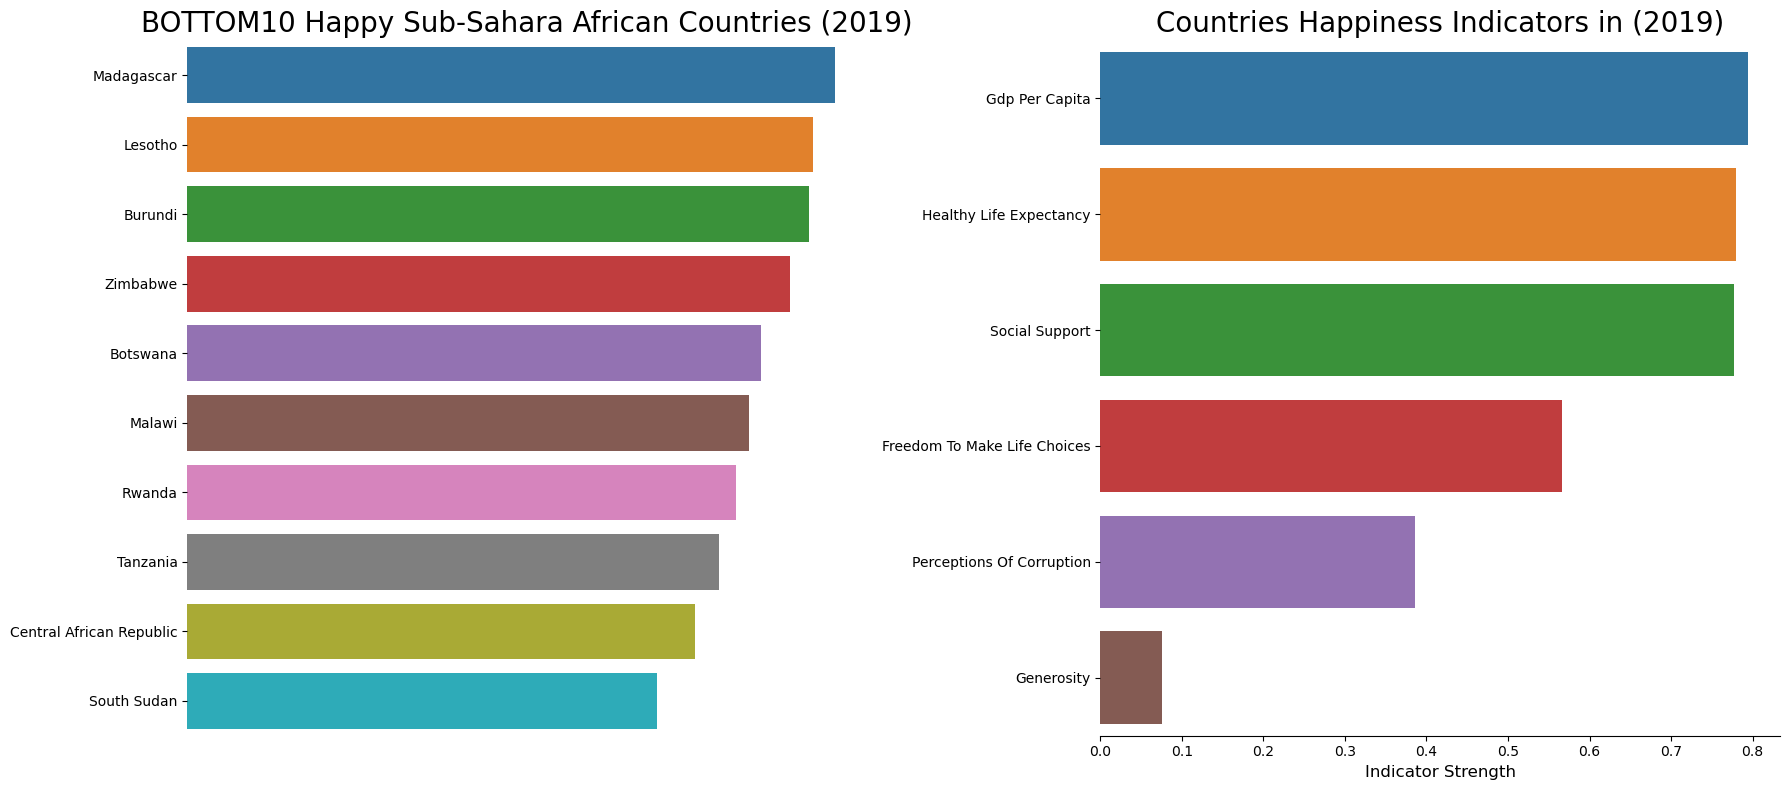

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))
data = bottom10_sa_africa.sort_values(by = 'Score', ascending = False)
sns.barplot(y = 'Country_or_region', x = 'Score', data = data, ax = ax[0])
 
ax[0].set_title('BOTTOM10 Happy Sub-Sahara African Countries (2019)', fontsize = 20)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_ylabel(None)

data = score_corr.sort_values(ascending = False) 
data.index = [name.replace('_', ' ').title() for name in data.index]
sns.barplot(y = data.index, x = data.values, ax = ax[1])

plt.title('Countries Happiness Indicators in (2019)', fontsize = 20)
plt.xlabel('Indicator Strength', fontsize = 12)
plt.ylabel(None)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('BOTTOM10 Happy Sub-Sahara African Countries (2019).png', dpi = 300)

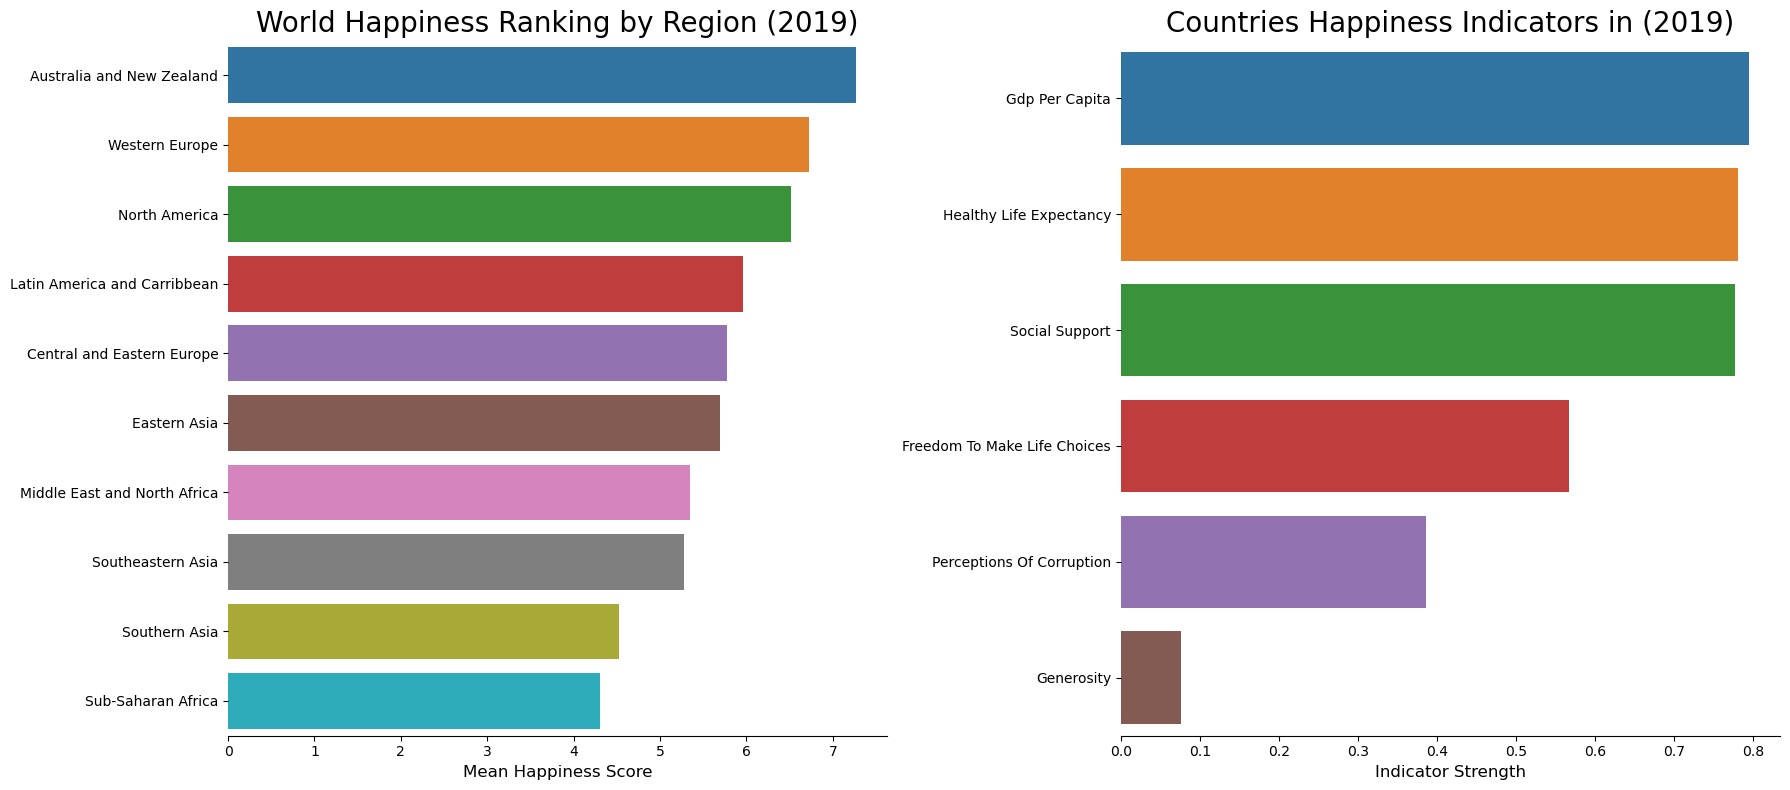

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))

data = happiness.sort_values(by = 'Mean_Happiness_Score', ascending = False)
sns.barplot(y = 'Regions', x = 'Mean_Happiness_Score', data = data, ax = ax[0])

ax[0].set_title('World Happiness Ranking by Region (2019)', fontsize = 20)
ax[0].set_xlabel('Mean Happiness Score', fontsize = 12)
ax[0].set_ylabel(None)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

data = score_corr.sort_values(ascending = False) 
data.index = [name.replace('_', ' ').title() for name in data.index]
sns.barplot(y = data.index, x = data.values, ax = ax[1])

plt.title('Countries Happiness Indicators in (2019)', fontsize = 20)
plt.xlabel('Indicator Strength', fontsize = 12)
plt.ylabel(None)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

fig.tight_layout()
plt.show()
fig.savefig('World Happiness Ranking by Region (2019)_2.png', dpi = 300)